# Иерфрхическая кластеризация

**Данные:** Экономика городов

**Задание:** 
- Определить число кластеров и обосновать свой выбор
- Разбить объекты на кластеры
- Предложить и обосновать интерпертацию кластеров

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import os

In [3]:
df = pd.read_csv("Econom_Cities_data.csv", sep=";", decimal=',', index_col='City')
df.head()

,Work,Price,Salary
City,,,
Amsterdam,1714,65.6,49.0
Athens,1792,53.8,30.4
Bogota,2152,37.9,11.5
Bombay,2052,30.3,5.3
Brussels,1708,73.8,50.5


In [4]:
# постмотрю всю таблицу с данными

print(df)

                Work  Price  Salary
City                               
Amsterdam       1714   65.6    49.0
Athens          1792   53.8    30.4
Bogota          2152   37.9    11.5
Bombay          2052   30.3     5.3
Brussels        1708   73.8    50.5
Buenos_Aires    1971   56.1    12.5
Cairo          -9999   37.1 -9999.0
Caracas         2041   61.0    10.9
Chicago         1924   73.9    61.9
Copenhagen      1717   91.3    62.9
Dublin          1759   76.0    41.4
Dusseldorf      1693   78.5    60.2
Frankfurt       1650   74.5    60.4
Geneva          1880   95.9    90.3
Helsinki        1667  113.6    66.6
Hong_Kong       2375   63.8    27.8
Houston         1978   71.9    46.3
Jakarta        -9999   43.6 -9999.0
Johannesburg    1945   51.1    24.0
Kuala_Lumpur    2167   43.5     9.9
Lagos           1786   45.2     2.7
Lisbon          1742   56.2    18.8
London          1737   84.2    46.2
Los_Angeles     2068   79.8    65.2
Luxembourg      1768   71.1    71.1
Madrid          1710   93.8 

В странах Cairo и Jakarta значения среднего числа рабочих часов и средняя зарплата за час работы равны -9999. Возможно, в данных какая-то ошибка. Они помешают для дальнейшего анализа, поэтому удалю данные строки.

In [5]:
df = df.drop(['Cairo','Jakarta'],axis = 0)
df

,Work,Price,Salary
City,,,
Amsterdam,1714,65.6,49.0
Athens,1792,53.8,30.4
Bogota,2152,37.9,11.5
Bombay,2052,30.3,5.3
Brussels,1708,73.8,50.5
Buenos_Aires,1971,56.1,12.5
Caracas,2041,61.0,10.9
Chicago,1924,73.9,61.9
Copenhagen,1717,91.3,62.9


Нужна стандартизация так как значения в столбце с рабочими часами намного больше чем в столбцах с ценами и зарплатами.

In [6]:
from sklearn import preprocessing

stand = preprocessing.StandardScaler()
#stand = preprocessing.MinMaxScaler()
#stand = preprocessing.MaxAbsScaler()

stand.fit(df)
X = stand.transform(df)

X = pd.DataFrame(X, index=df.index, columns=df.columns)

In [7]:
X.head()

,Work,Price,Salary
City,,,
Amsterdam,-0.962166,-0.212712,0.386095
Athens,-0.509827,-0.770489,-0.373488
Bogota,1.577891,-1.522069,-1.145323
Bombay,0.997969,-1.881316,-1.398517
Brussels,-0.996961,0.174896,0.447351


In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

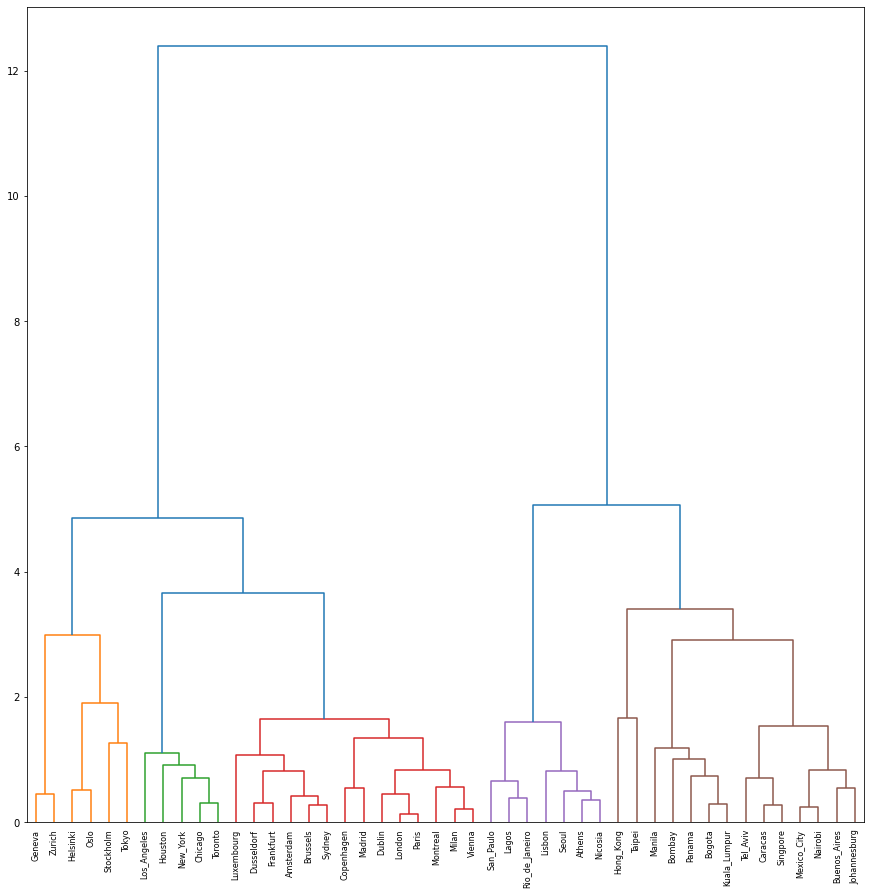

In [9]:
link = linkage(X, 'ward', 'euclidean')

fig = plt.figure(figsize=(15,15))
dn = dendrogram(link,
                labels=X.index.tolist(),
                color_threshold = 3.5)

Скачок в расстояниях между объединяемыми кластерами происходит, примерно, на уровне 3.5. Поэтому задала порог для расстояния = 3.5, цветом выделилось 5 кластеров.

In [10]:
# добавлю к таблице с данными столбец с номером кластера

df['cluster'] = fcluster(link, 3.5, criterion='distance')

In [11]:
# сгруппирую данные по номеру кластера и для каждого значения посчитаю среднее

df.groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
1,1780.500000,108.550000,71.300000
2,1960.000000,75.820000,59.480000
3,1732.000000,78.135714,53.614286
4,1798.857143,50.942857,19.214286
5,2082.357143,53.121429,14.914286


In [12]:
# какие города попали в 1 кластер?

df[df['cluster']==1].index.values

array(['Geneva', 'Helsinki', 'Oslo', 'Stockholm', 'Tokyo', 'Zurich'],
      dtype=object)

В первый кластер попали города Скандинавских стран, а также Швейцарии и японский Токио. Эти города отличаются сильной экономикой, поэтому там самые высокие средние цены и самые высокие заработные платы.

In [13]:
df[df['cluster']==2].index.values

array(['Chicago', 'Houston', 'Los_Angeles', 'New_York', 'Toronto'],
      dtype=object)

Во второй кластер попали самые густонаселенные города США и крупнейший город Канады - Торонто. Все эти города расположены в Северной Америке. Их экономические показатели говорят о том, что люди там больше работают, но имеют более низкие цены и зарплаты по сравнению с 1 кластером.

In [14]:
df[df['cluster']==3].index.values

array(['Amsterdam', 'Brussels', 'Copenhagen', 'Dublin', 'Dusseldorf',
       'Frankfurt', 'London', 'Luxembourg', 'Madrid', 'Milan', 'Montreal',
       'Paris', 'Sydney', 'Vienna'], dtype=object)

В третий кластор вошли, в основном, города Европы, а также канадский Монреаль и австралийский Сидней. Это города с хорошей экономикой. Здесь в среднем у людей меньшее количество часов работы, высокие цены и средние зарплаты.

In [15]:
df[df['cluster']==4].index.values

array(['Athens', 'Lagos', 'Lisbon', 'Nicosia', 'Rio_de_Janeiro',
       'San_Paulo', 'Seoul'], dtype=object)

В данном кластере города-порты. Исключением является кипрская столица Никосия и корейский Сеул. Здесь невысокое среднее количество рабочих часов, низкте цены, но средняя зарплата маленькая, боллее чем в 2.5 раза ниже цен.

In [16]:
df[df['cluster']==5].index.values

array(['Bogota', 'Bombay', 'Buenos_Aires', 'Caracas', 'Hong_Kong',
       'Johannesburg', 'Kuala_Lumpur', 'Manila', 'Mexico_City', 'Nairobi',
       'Panama', 'Singpore', 'Taipei', 'Tel_Aviv'], dtype=object)

В пятом кластере города со всех континентов, но их объединяет густонаселенность. Мест всем не хватает, поэтому люди работают много часов и имеют низкие заработные платы в сравнении с ценами на товары. Сингапур и Гонконг в 19991 году еще только набирали обороты в росте экономики, поэтому попали в данные кластер. Сейчас это города с одни из самых высоких ВВП в мире.

**Вывод:** В предоставленных данных я выделила 5 кластеров, каждый из которых попыталась проинтерпретировать и объяснить что их объединяет.